In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('/Users/sabin/Documents/Development/Kaggle/House price/train.csv', index_col='Id')

In [4]:
test = pd.read_csv('/Users/sabin/Documents/Development/Kaggle/House price/test.csv', index_col='Id')

In [5]:
sub = pd.read_csv('/Users/sabin/Documents/Development/Kaggle/House price/sample_submission.csv')

In [6]:
train.shape

(1460, 80)

In [7]:
set(train) - set(test)

{'SalePrice'}

In [8]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


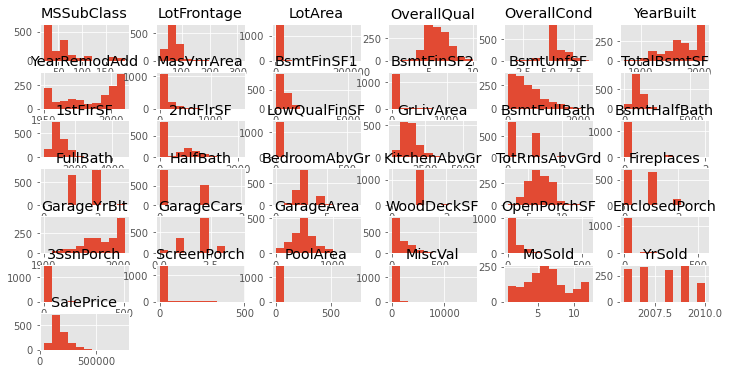

In [9]:
_ = train.hist(figsize=(12,6))

In [10]:
pd.concat([train.isnull().sum(), train.isnull().mean()],axis=1).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,0.0,0.0,0.0,37.000000,37.000000,38.000000,37.000000,0.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.000000,81.000000,81.000000,81.000000,0.0,0.0,81.000000,81.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1453.000000,1179.000000,1406.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


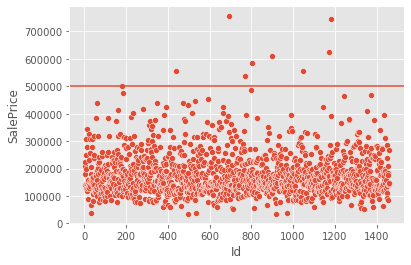

In [12]:
sns.scatterplot(data=train, x=train.index, y='SalePrice')
plt.axhline(500000)

In [13]:
train.select_dtypes(include='object').nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [14]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

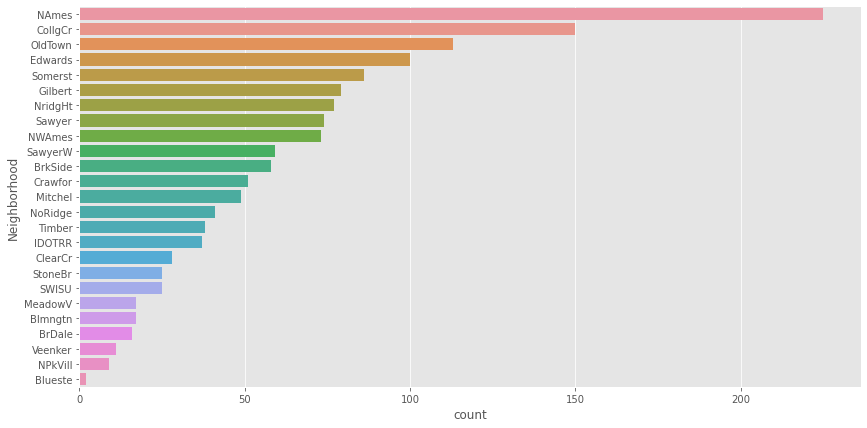

In [15]:
plt.figure(figsize=(14,7))
sns.countplot(data=train, y='Neighborhood',
             order=train['Neighborhood'].value_counts().index)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

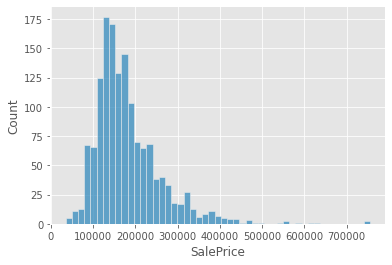

In [16]:
sns.histplot(data=train,x='SalePrice')

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [18]:
ss = StandardScaler()
train['SalePrice_ss'] = ss.fit_transform(train[['SalePrice']])

In [19]:
mm = MinMaxScaler()
train['SalePrice_mm'] = mm.fit_transform(train[['SalePrice']])

In [20]:
rb = RobustScaler()
train['SalePrice_rs'] = rb.fit_transform(train[['SalePrice']])

In [21]:
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]]

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
Id,,,,
1,208500,0.347273,0.241078,0.541506
2,181500,0.007288,0.203583,0.220173
3,223500,0.536154,0.261908,0.720024
4,140000,-0.515281,0.145952,-0.273728
5,250000,0.869843,0.298709,1.035406
...,...,...,...,...
1456,175000,-0.074560,0.194556,0.142815
1457,210000,0.366161,0.243161,0.559357
1458,266500,1.077611,0.321622,1.231776


In [22]:
pd.options.display.float_format = '{:,.2f}'.format

In [23]:
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].describe()

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
count,"1,460.00","1,460.00","1,460.00","1,460.00"
mean,"180,921.20",0.00,0.20,0.21
std,"79,442.50",1.00,0.11,0.95
min,"34,900.00",-1.84,0.00,-1.52
25%,"129,975.00",-0.64,0.13,-0.39
50%,"163,000.00",-0.23,0.18,0.00
75%,"214,000.00",0.42,0.25,0.61
max,"755,000.00",7.23,1.00,7.05


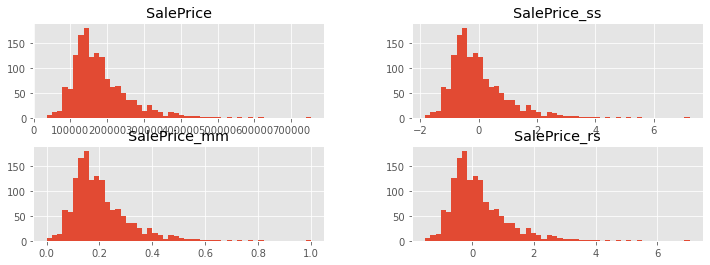

In [24]:
_ = train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].hist(figsize=(12,4), bins=50)

In [25]:
train['SalePrice_log1p'] = np.log1p(train['SalePrice'])
train['SalePrice_ss_log1p'] = np.log1p(train['SalePrice_ss'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
train['SalePrice_log1p_ss'] = ss.fit_transform(train[['SalePrice_log1p']])

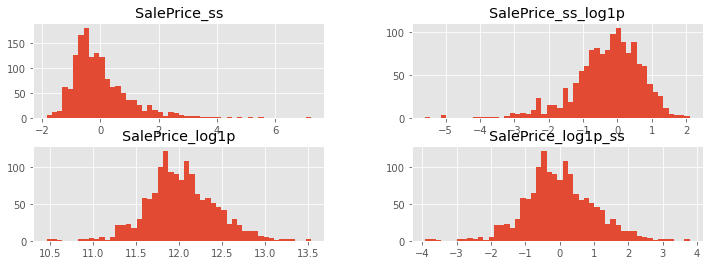

In [27]:
_ = train[['SalePrice_ss', 'SalePrice_ss_log1p', 'SalePrice_log1p', 'SalePrice_log1p_ss']].hist(figsize=(12,4), bins=50)

/var/folders/7v/_59t8s8j3p178243f95xk35r0000gn/T/ipykernel_95344/4160374337.py:2: RuntimeWarning: divide by zero encountered in log
  sns.lineplot(x=x, y=np.log(x))


<AxesSubplot:>

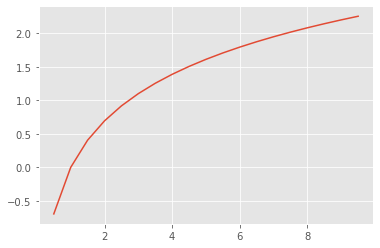

In [28]:
x = np.arange(0,10,0.5)
sns.lineplot(x=x, y=np.log(x))

In [29]:
np.log(-1)

/var/folders/7v/_59t8s8j3p178243f95xk35r0000gn/T/ipykernel_95344/153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

<AxesSubplot:>

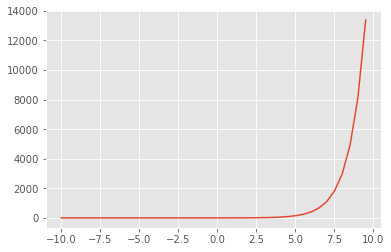

In [30]:
x = np.arange(-10,10,0.5)
sns.lineplot(x=x, y=np.exp(x))

In [31]:
train['SalePrice_cut'] = pd.cut(train['SalePrice'], bins=4, labels=list(range(1,5)))
train['SalePrice_qcut'] = pd.qcut(train['SalePrice'], q=4, labels=list(range(1,5)))

In [32]:
train[['SalePrice_cut','SalePrice_qcut']].value_counts()

SalePrice_cut  SalePrice_qcut
1              2                 367
               3                 366
               1                 365
2              4                 330
3              4                  25
4              4                   5
1              4                   2
dtype: int64

<AxesSubplot:xlabel='SalePrice_qcut', ylabel='count'>

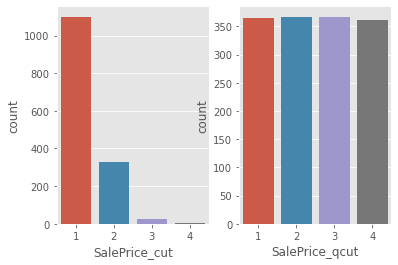

In [33]:
fig, axes = plt.subplots(1,2)
sns.countplot(data=train, x='SalePrice_cut',ax=axes[0])
sns.countplot(data=train, x='SalePrice_qcut',ax=axes[1])

In [34]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [35]:
train['MSZoning'].astype('category').cat.codes

Id
1       3
2       3
3       3
4       3
5       3
       ..
1456    3
1457    3
1458    3
1459    3
1460    3
Length: 1460, dtype: int8

In [36]:
pd.get_dummies(train['MSZoning'])

,C (all),FV,RH,RL,RM
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

oh = OneHotEncoder()
od = OrdinalEncoder()
MSZoning_ohe = oh.fit_transform(train[['MSZoning']])
train[['MSZoning_od']] = od.fit_transform(train[['MSZoning']])

In [38]:
MSZoning_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [39]:
oh.categories_[0].tolist()

['C (all)', 'FV', 'RH', 'RL', 'RM']

In [40]:
od.categories_[0].tolist()

['C (all)', 'FV', 'RH', 'RL', 'RM']

In [41]:
train[oh.categories_[0].tolist()] = pd.DataFrame(MSZoning_ohe.toarray(), columns=oh.categories_[0])

In [125]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rb,SalePrice_rs,SalePrice_log1p,SalePrice_ss_log1p,SalePrice_log1p_ss,SalePrice_cut,SalePrice_qcut,MSZoning_oh,MSZoning_od,C (all),FV,RH,RL,RM
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.35,0.24,0.54,0.54,12.25,0.30,0.56,1,3,"(0, 3)\t1.0",3.00,0.00,0.00,0.00,1.00,0.00
2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.01,0.20,0.22,0.22,12.11,0.01,0.21,1,3,"(0, 3)\t1.0",3.00,0.00,0.00,0.00,1.00,0.00
3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.54,0.26,0.72,0.72,12.32,0.43,0.73,2,4,"(0, 3)\t1.0",3.00,0.00,0.00,0.00,1.00,0.00
4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,-0.52,0.15,-0.27,-0.27,11.85,-0.72,-0.44,1,2,"(0, 3)\t1.0",3.00,0.00,0.00,0.00,1.00,0.00
5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0.87,0.30,1.04,1.04,12.43,0.63,1.01,2,4,"(0, 3)\t1.0",3.00,0.00,0.00,0.00,1.00,0.00


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 94 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1460 non-null   int64   
 1   MSZoning            1460 non-null   object  
 2   LotFrontage         1201 non-null   float64 
 3   LotArea             1460 non-null   int64   
 4   Street              1460 non-null   object  
 5   Alley               91 non-null     object  
 6   LotShape            1460 non-null   object  
 7   LandContour         1460 non-null   object  
 8   Utilities           1460 non-null   object  
 9   LotConfig           1460 non-null   object  
 10  LandSlope           1460 non-null   object  
 11  Neighborhood        1460 non-null   object  
 12  Condition1          1460 non-null   object  
 13  Condition2          1460 non-null   object  
 14  BldgType            1460 non-null   object  
 15  HouseStyle          1460 non-null   ob

In [51]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures()
pf_val = pf.fit_transform(train[['MSSubClass','LotArea']])
pd.DataFrame(pf_val, columns = pf.get_feature_names_out())

,1,MSSubClass,LotArea,MSSubClass^2,MSSubClass LotArea,LotArea^2
0,1.00,60.00,"8,450.00","3,600.00","507,000.00","71,402,500.00"
1,1.00,20.00,"9,600.00",400.00,"192,000.00","92,160,000.00"
2,1.00,60.00,"11,250.00","3,600.00","675,000.00","126,562,500.00"
3,1.00,70.00,"9,550.00","4,900.00","668,500.00","91,202,500.00"
4,1.00,60.00,"14,260.00","3,600.00","855,600.00","203,347,600.00"
...,...,...,...,...,...,...
1455,1.00,60.00,"7,917.00","3,600.00","475,020.00","62,678,889.00"
1456,1.00,20.00,"13,175.00",400.00,"263,500.00","173,580,625.00"
1457,1.00,70.00,"9,042.00","4,900.00","632,940.00","81,757,764.00"
1458,1.00,20.00,"9,717.00",400.00,"194,340.00","94,420,089.00"


In [60]:
for col in train.select_dtypes(include='object').columns:
    print(train[col].value_counts(normalize=True))

RL        0.79
RM        0.15
FV        0.04
RH        0.01
C (all)   0.01
Name: MSZoning, dtype: float64
Pave   1.00
Grvl   0.00
Name: Street, dtype: float64
Grvl   0.55
Pave   0.45
Name: Alley, dtype: float64
Reg   0.63
IR1   0.33
IR2   0.03
IR3   0.01
Name: LotShape, dtype: float64
Lvl   0.90
Bnk   0.04
HLS   0.03
Low   0.02
Name: LandContour, dtype: float64
AllPub   1.00
NoSeWa   0.00
Name: Utilities, dtype: float64
Inside    0.72
Corner    0.18
CulDSac   0.06
FR2       0.03
FR3       0.00
Name: LotConfig, dtype: float64
Gtl   0.95
Mod   0.04
Sev   0.01
Name: LandSlope, dtype: float64
NAmes     0.15
CollgCr   0.10
OldTown   0.08
Edwards   0.07
Somerst   0.06
Gilbert   0.05
NridgHt   0.05
Sawyer    0.05
NWAmes    0.05
SawyerW   0.04
BrkSide   0.04
Crawfor   0.03
Mitchel   0.03
NoRidge   0.03
Timber    0.03
IDOTRR    0.03
ClearCr   0.02
StoneBr   0.02
SWISU     0.02
MeadowV   0.01
Blmngtn   0.01
BrDale    0.01
Veenker   0.01
NPkVill   0.01
Blueste   0.00
Name: Neighborhood, dtype: fl

In [57]:
col_list = []
for col in train.select_dtypes(include='object').columns:
    if any(train[col].value_counts(normalize=True) > 0.8):
        col_list.append(col)

col_list

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [64]:
train.drop(col_list, axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs,SalePrice_log1p,SalePrice_ss_log1p,SalePrice_log1p_ss,SalePrice_cut,SalePrice_qcut,MSZoning_od,C (all),FV,RH,RL,RM
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,NaN,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.00,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NaN,Attchd,"2,003.00",RFn,2,548,0,61,0,0,0,0,NaN,NaN,0,2,2008,208500,0.35,0.24,0.54,12.25,0.30,0.56,1,3,3.00,0.00,0.00,0.00,1.00,0.00
2,20,RL,80.00,9600,NaN,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.00,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,"1,976.00",RFn,2,460,298,0,0,0,0,0,NaN,NaN,0,5,2007,181500,0.01,0.20,0.22,12.11,0.01,0.21,1,3,3.00,0.00,0.00,0.00,1.00,0.00
3,60,RL,68.00,11250,NaN,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.00,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,"2,001.00",RFn,2,608,0,42,0,0,0,0,NaN,NaN,0,9,2008,223500,0.54,0.26,0.72,12.32,0.43,0.73,2,4,3.00,0.00,0.00,0.00,1.00,0.00
4,70,RL,60.00,9550,NaN,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.00,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,"1,998.00",Unf,3,642,0,35,272,0,0,0,NaN,NaN,0,2,2006,140000,-0.52,0.15,-0.27,11.85,-0.72,-0.44,1,2,3.00,0.00,0.00,0.00,1.00,0.00
5,60,RL,84.00,14260,NaN,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.00,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,"2,000.00",RFn,3,836,192,84,0,0,0,0,NaN,NaN,0,12,2008,250000,0.87,0.30,1.04,12.43,0.63,1.01,2,4,3.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.00,7917,NaN,Reg,Inside,Gilbert,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.00,TA,PConc,Gd,No,Unf,0,0,953,953,Ex,953,694,0,1647,0,0,2,1,3,1,TA,7,1,TA,Attchd,"1,999.00",RFn,2,460,0,40,0,0,0,0,NaN,NaN,0,8,2007,175000,-0.07,0.19,0.14,12.07,-0.08,0.12,1,3,3.00,0.00,0.00,0.00,1.00,0.00
1457,20,RL,85.00,13175,NaN,Reg,Inside,NWAmes,1Story,6,6,1978,1988,Gable,Plywood,Plywood,Stone,119.00,TA,CBlock,Gd,No,ALQ,790,163,589,1542,TA,2073,0,0,2073,1,0,2,0,3,1,TA,7,2,TA,Attchd,"1,978.00",Unf,2,500,349,0,0,0,0,0,NaN,MnPrv,0,2,2010,210000,0.37,0.24,0.56,12.25,0.31,0.58,1,3,3.00,0.00,0.00,0.00,1.00,0.00
1458,70,RL,66.00,9042,NaN,Reg,Inside,Crawfor,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,None,0.00,Ex,Stone,TA,No,GLQ,275,0,877,1152,Ex,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,2,Gd,Attchd,"1,941.00",RFn,1,252,0,60,0,0,0,0,NaN,GdPrv,2500,5,2010,266500,1.08,0.32,1.23,12.49,0.73,1.17,2,4,3.00,0.00,0.00,0.00,1.00,0.00


In [65]:
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs,SalePrice_log1p,SalePrice_ss_log1p,SalePrice_log1p_ss,MSZoning_od,C (all),FV,RH,RL,RM
MSSubClass,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08,-0.08,-0.08,-0.08,-0.07,-0.03,-0.07,0.04,0.04,0.06,0.00,-0.03,-0.00
LotFrontage,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35,0.35,0.35,0.35,0.36,0.29,0.36,-0.11,-0.06,-0.02,-0.03,0.04,-0.01
LotArea,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26,0.26,0.26,0.26,0.26,0.21,0.26,-0.03,-0.03,-0.01,-0.01,-0.00,0.02
OverallQual,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.55,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79,0.79,0.79,0.79,0.82,0.74,0.82,-0.16,-0.04,-0.03,-0.02,0.03,-0.00
OverallCond,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.32,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08,-0.08,-0.08,-0.08,-0.04,-0.16,-0.04,0.19,0.01,-0.03,0.00,0.01,0.00
YearBuilt,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52,0.52,0.52,0.52,0.59,0.57,0.59,-0.31,-0.01,0.01,-0.01,-0.02,0.01
YearRemodAdd,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51,0.51,0.51,0.51,0.57,0.53,0.57,-0.17,0.02,-0.03,-0.02,0.02,-0.01
MasVnrArea,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.28,0.20,0.10,-0.04,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48,0.48,0.48,0.48,0.43,0.38,0.43,-0.07,-0.03,0.01,-0.03,-0.04,0.05
BsmtFinSF1,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39,0.39,0.39,0.39,0.37,0.29,0.37,-0.05,-0.01,-0.03,-0.01,0.02,-0.00
BsmtFinSF2,-0.07,0.05,0.11,-0.06,0.04,-0.05,-0.07,-0.07,-0.05,1.00,-0.21,0.10,0.10,-0.10,0.01,-0.01,0.16,0.07,-0.08,-0.03,-0.02,-0.04,-0.04,0.05,-0.09,-0.04,-0.02,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,-0.02,0.03,-0.01,-0.01,-0.01,-0.01,0.00,-0.00,0.00,0.03,-0.02,0.01,0.03,-0.04,0.03


<AxesSubplot:>

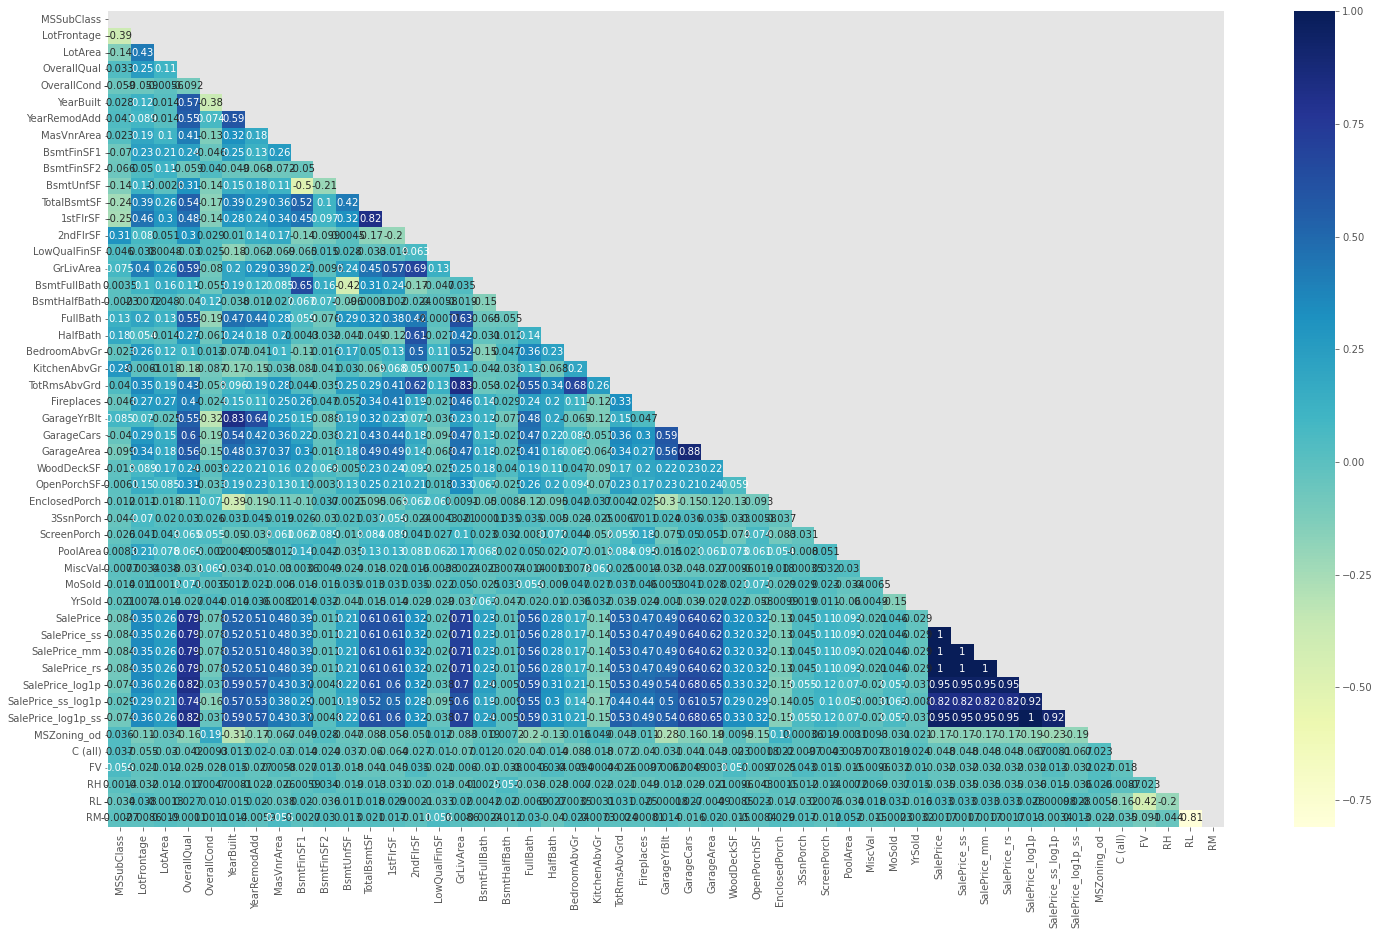

In [81]:
plt.figure(figsize=(25,15))
mask = np.triu(np.ones_like(train.corr()))
sns.heatmap(data=train.corr(), cmap='YlGnBu', mask=mask, annot=True)

In [82]:
train_corr = train.corr()
corr_list = []
for c in train_corr.columns:
    for i in train_corr.index:
        if (train_corr.loc[i,c] > 0.8) & (i != c):
            corr_list.append((i,c,train_corr.loc[i,c]))
corr_list

[('SalePrice_log1p', 'OverallQual', 0.8171846144867676),
 ('SalePrice_log1p_ss', 'OverallQual', 0.8171846144867659),
 ('GarageYrBlt', 'YearBuilt', 0.8256674841743408),
 ('1stFlrSF', 'TotalBsmtSF', 0.8195299750050339),
 ('TotalBsmtSF', '1stFlrSF', 0.8195299750050339),
 ('TotRmsAbvGrd', 'GrLivArea', 0.8254893743088425),
 ('GrLivArea', 'TotRmsAbvGrd', 0.8254893743088425),
 ('YearBuilt', 'GarageYrBlt', 0.8256674841743408),
 ('GarageArea', 'GarageCars', 0.882475414281462),
 ('GarageCars', 'GarageArea', 0.882475414281462),
 ('SalePrice_ss', 'SalePrice', 0.999999999999999),
 ('SalePrice_mm', 'SalePrice', 1.000000000000001),
 ('SalePrice_rs', 'SalePrice', 1.0000000000000009),
 ('SalePrice_log1p', 'SalePrice', 0.9483743770902764),
 ('SalePrice_ss_log1p', 'SalePrice', 0.8226103463846883),
 ('SalePrice_log1p_ss', 'SalePrice', 0.948374377090276),
 ('SalePrice', 'SalePrice_ss', 0.999999999999999),
 ('SalePrice_mm', 'SalePrice_ss', 1.0000000000000013),
 ('SalePrice_rs', 'SalePrice_ss', 1.00000000000

In [85]:
df_num = train.select_dtypes(include="number").dropna()
df_num.isnull().sum().sum()

0

In [86]:
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'SalePrice_ss', 'SalePrice_mm',
       'SalePrice_rs', 'SalePrice_log1p', 'SalePrice_ss_log1p',
       'SalePrice_log1p_ss', 'MSZoning_od', 'C (all)', 'FV', 'RH', 'RL', 'RM'],
      dtype='object')

In [89]:
x = df_num[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_od', 'C (all)', 'FV', 'RH', 'RL', 'RM']]
y = df_num['SalePrice_log1p']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [93]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(random_state=42)

In [96]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<AxesSubplot:>

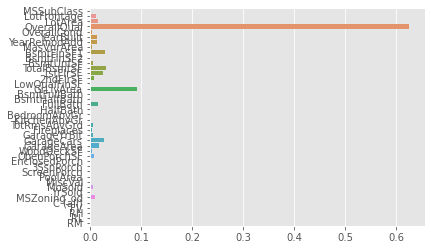

In [97]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)